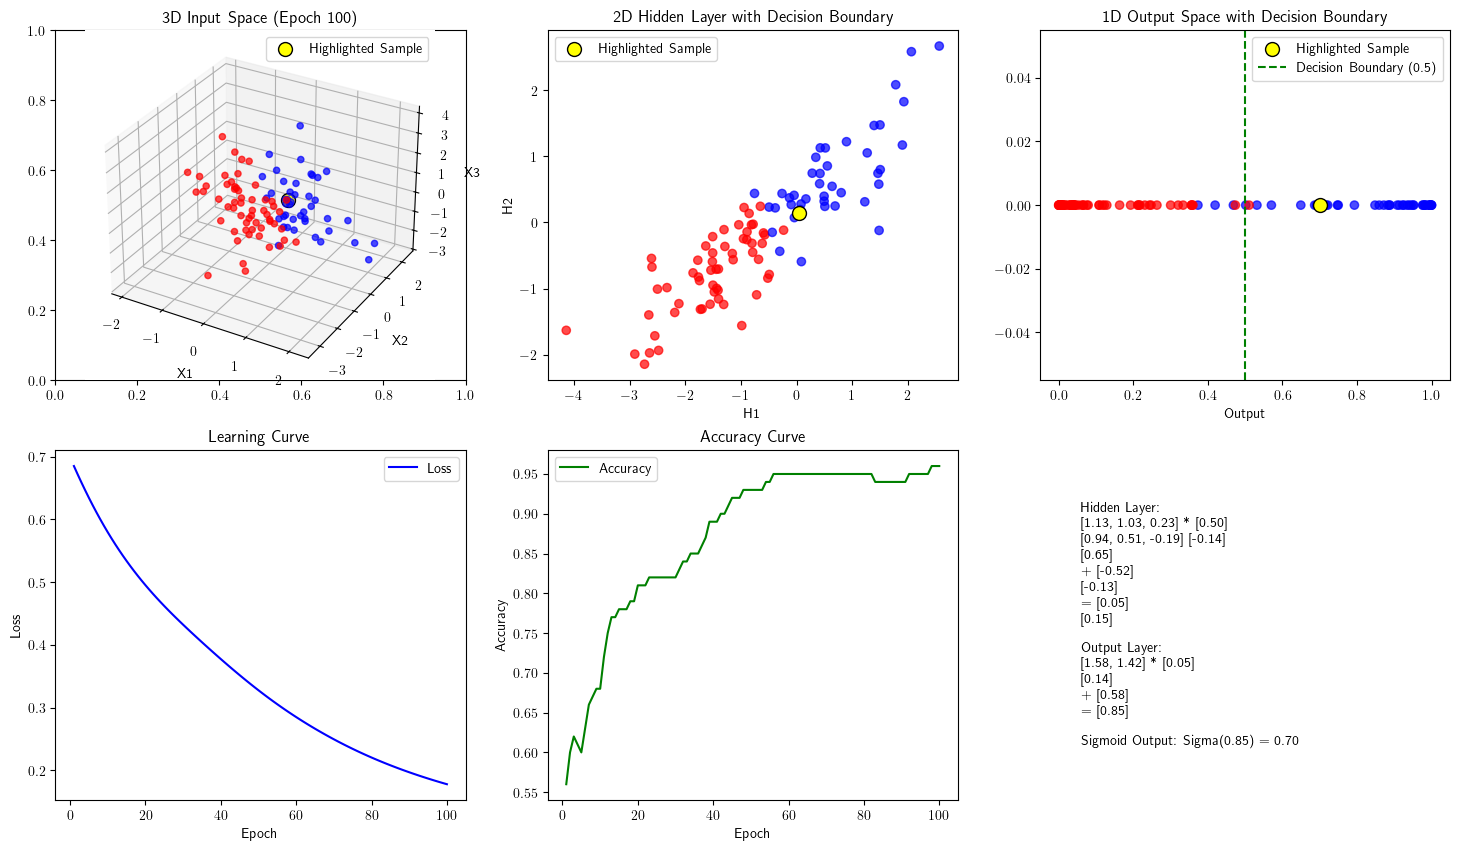

Epoch 100/100, Loss: 0.1781, Accuracy: 0.9600
[ 0.49671415 -0.1382643   0.64768854]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import torch
import torch.nn as nn
import torch.optim as optim

plt.rcParams['text.usetex'] = True

# Generate synthetic 3D input data
np.random.seed(42)
n_samples = 100
X = np.random.randn(n_samples, 3)  # 3D input
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Simple binary classification (based on a plane)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(3, 2)  # Reduce 3D to 2D
        self.output = nn.Linear(2, 1)  # Reduce 2D to 1D
    
    def forward(self, x):
        hidden = self.hidden(x)
        out = self.output(hidden)
        return hidden, out

# Initialize the model, loss, and optimizer
model = SimpleNN()
criterion = nn.BCEWithLogitsLoss()  # Binary classification loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Metrics to track
losses = []
accuracies = []

# Training loop
n_epochs = 200
for epoch in range(1, n_epochs + 1):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    hidden_out, output = model(X_tensor)
    loss = criterion(output, y_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Compute accuracy
    with torch.no_grad():
        predictions = torch.sigmoid(output) > 0.5  # Binary predictions
        accuracy = (predictions == y_tensor).float().mean().item()
    
    # Track metrics
    losses.append(loss.item())
    accuracies.append(accuracy)
    
    # Convert outputs to NumPy for visualization
    hidden_out_np = hidden_out.detach().numpy()
    output_np = torch.sigmoid(output).detach().numpy()  # Apply sigmoid for probabilities

    # Select the first sample to show real inputs and outputs
    sample_idx = 0
    x_sample = X[sample_idx]  # Real input
    hidden_sample = hidden_out_np[sample_idx]  # Hidden layer output
    output_sample = output_np[sample_idx][0]  # Final output

    # Visualization setup
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))

    # Create 3D subplot for the input space
    ax_3d = fig.add_subplot(231, projection='3d')
    ax_2d = axs[0, 1]
    ax_1d = axs[0, 2]

    colors = ['red' if label == 0 else 'blue' for label in y]
    
    # 3D space
    ax_3d.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, alpha=0.7)
    ax_3d.scatter(x_sample[0], x_sample[1], x_sample[2], c='yellow', s=100, edgecolor='black', label='Highlighted Sample')
    ax_3d.set_title(f"3D Input Space (Epoch {epoch})")
    ax_3d.set_xlabel("X1")
    ax_3d.set_ylabel("X2")
    ax_3d.set_zlabel("X3")
    ax_3d.legend()
    
    # 2D hidden space
    ax_2d.scatter(hidden_out_np[:, 0], hidden_out_np[:, 1], c=colors, alpha=0.7)
    ax_2d.scatter(hidden_sample[0], hidden_sample[1], c='yellow', s=100, edgecolor='black', label='Highlighted Sample')
    ax_2d.set_title("2D Hidden Layer with Decision Boundary")
    ax_2d.set_xlabel("H1")
    ax_2d.set_ylabel("H2")
    ax_2d.legend()
    
    # 1D output space
    ax_1d.scatter(output_np[:, 0], np.zeros_like(output_np[:, 0]), c=colors, alpha=0.7)
    ax_1d.scatter(output_sample, 0, c='yellow', s=100, edgecolor='black', label='Highlighted Sample')
    ax_1d.axvline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')
    ax_1d.set_title("1D Output Space with Decision Boundary")
    ax_1d.set_xlabel("Output")
    ax_1d.legend()
    
    # Learning curve plot
    axs[1, 0].plot(range(1, epoch + 1), losses, label="Loss", color='blue')
    axs[1, 0].set_title("Learning Curve")
    axs[1, 0].set_xlabel("Epoch")
    axs[1, 0].set_ylabel("Loss")
    axs[1, 0].legend()
    
    # Accuracy plot
    axs[1, 1].plot(range(1, epoch + 1), accuracies, label="Accuracy", color='green')
    axs[1, 1].set_title("Accuracy Curve")
    axs[1, 1].set_xlabel("Epoch")
    axs[1, 1].set_ylabel("Accuracy")
    axs[1, 1].legend()
    
    # Display weights, biases, and computation in LaTeX-style
    axs[1, 2].axis('off')  # Turn off axis
    
    # Highlighted sample (we'll use the first sample for simplicity)
    sample_idx = 0
    x_sample = X[sample_idx]  # Real input for the highlighted sample
    hidden_sample = hidden_out_np[sample_idx]  # Hidden layer output for the sample
    output_sample = output_np[sample_idx][0]  # Final output for the sample

    # Generate the weight matrices and biases as NumPy arrays for computation
    hidden_weights = model.hidden.weight.detach().numpy()
    hidden_biases = model.hidden.bias.detach().numpy()
    output_weights = model.output.weight.detach().numpy()
    output_bias = model.output.bias.detach().numpy()

    # Perform manual computations for display
    hidden_layer_result = hidden_weights @ x_sample + hidden_biases
    output_layer_result = output_weights @ hidden_sample + output_bias

    # Generate plain-text equations with better alignment and spacing
    equation_text = (
        f"Hidden Layer:\n"
        f"  [{hidden_weights[0,0]:.2f}, {hidden_weights[0,1]:.2f}, {hidden_weights[0,2]:.2f}]   *   [{x_sample[0]:.2f}]\n"
        f"  [{hidden_weights[1,0]:.2f}, {hidden_weights[1,1]:.2f}, {hidden_weights[1,2]:.2f}]       [{x_sample[1]:.2f}]\n"
        f"                                      [{x_sample[2]:.2f}]\n"
        f"+ [{hidden_biases[0]:.2f}]\n"
        f"  [{hidden_biases[1]:.2f}]\n"
        f"= [{hidden_layer_result[0]:.2f}]\n"
        f"  [{hidden_layer_result[1]:.2f}]\n\n"
        f"Output Layer:\n"
        f"  [{output_weights[0,0]:.2f}, {output_weights[0,1]:.2f}]   *   [{hidden_sample[0]:.2f}]\n"
        f"                                      [{hidden_sample[1]:.2f}]\n"
        f"+ [{output_bias[0]:.2f}]\n"
        f"= [{output_layer_result[0]:.2f}]\n\n"
        f"Sigmoid Output: Sigma({output_layer_result[0]:.2f}) = {output_sample:.2f}"
    )
    axs[1, 2].axis('off')  # Turn off the subplot axes
    axs[1, 2].text(0.1, 0.5, equation_text, fontsize=10, verticalalignment='center', transform=axs[1, 2].transAxes)

    # Update the visualization
    clear_output(wait=True)
    display(fig)
    plt.close(fig)

    # Print metrics
    print(f"Epoch {epoch}/{n_epochs}, Loss: {loss.item():.4f}, Accuracy: {accuracy:.4f}")

print(x_sample)
# Final static display
plt.show()